### References:
1. Code for importing dataset, making np array for predictions, plotting predictions graph: Grimmelmann, Erik K. Adaline 22G.ipynb
2. Documentation for SVM Kernels: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
2. Flatten a multi-index dataframe:
https://www.statology.org/pandas-flatten-multiindex/


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from mpl_toolkits import mplot3d
from sklearn import datasets

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [68]:
# some of the colors I will use in plotting

colors = ['#335BFF', '#FF3333', '#33D7FF', '#FF9933', '#069B08', '#A907F5' ]
styles = ['-', '--', ':', '-.', '-']

### Import the Iris Dataset

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
Xzeroes0 = (0. * X) + 0.2
Xzeroes1 = (0. * X)
Xzeroes2 = (0. * X) -  0.2
x_min, x_max = X.min() - 0.5, X.max() + 1.5

### Look at the first 10 lines of the data

In [5]:
for i in range(11):
    print(i, X[i,:], Y[i])

0 [5.1 3.5 1.4 0.2] 0
1 [4.9 3.  1.4 0.2] 0
2 [4.7 3.2 1.3 0.2] 0
3 [4.6 3.1 1.5 0.2] 0
4 [5.  3.6 1.4 0.2] 0
5 [5.4 3.9 1.7 0.4] 0
6 [4.6 3.4 1.4 0.3] 0
7 [5.  3.4 1.5 0.2] 0
8 [4.4 2.9 1.4 0.2] 0
9 [4.9 3.1 1.5 0.1] 0
10 [5.4 3.7 1.5 0.2] 0


### Get Iris Classifications

In [6]:
# create an array of classes
IC = np.unique(Y)
# tuples for class name and plots: color, bg color, mark
IrisC = ('Setosa', 'Versicolor', 'Virginica')
pltC = ('red', 'blue', 'green')
pltCback = ('pink', 'lightblue', 'lightgreen')
pltM = ('o', 'x', '*')

In [7]:
for i in range(3):
    print(IC[i], pltM[i], IrisC[i], pltC[i],
          pltCback[i])

0 o Setosa red pink
1 x Versicolor blue lightblue
2 * Virginica green lightgreen


### Setup Iris Feature Labels

In [8]:
IrisF = ('sepal length (cm)', 'sepal width (cm)',
         'petal length (cm)', 'petal width (cm)')

In [9]:
for i in range(4):
    print(IrisF[i])

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


### Generates all 60 combinations

In [10]:
combos_F = [[0, 1], [0, 2], [0, 3],
           [1, 2], [1, 3], [2, 3]]           

In [11]:
combos_F

[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

### Choose Classes and Features to be Modeled

In [12]:
def do_everything(my_index, model_type):
    
    # classes - include all classes
    cdx = np.array([0,1,2]) 
    nC = len(cdx)

    # features - 2 at a time
    fdx = np.array(combos_F[my_index])

    # features chosen
    nF = len(fdx)

    features = []

    for i in range(nF):
        features.append(IrisF[fdx[i]])

    nbr_features = len(features)
    features_str = ''.join(features)

    # create arrays of zeroes:
    # YY = one column of all zeros, length equal to numY
    # XX = one column of all zeros , length = numY for each feature you have chosen
    
    numY = len(Y)
    
    YY = np.zeros((numY))
    XX = np.zeros((numY, nF))

    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[cdx[k]]:        
                YY[j] = IC[cdx[k]]
                for m in range(nF):
                    XX[j,m] = X[i,fdx[m]] 
                j += 1
    
    # create and fit the models for each type of model
    if model_type == 'SGD_MH':
        clf = SGDClassifier('modified_huber', tol=1e-4, random_state=0)
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
    elif model_type == 'LR':
        clf = LogisticRegression()
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
    elif model_type == 'SVM-Linear':
        clf = SVC(kernel='linear')
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
    elif model_type == 'SVM-Poly':
        clf = SVC(kernel='poly')
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
    elif model_type == 'SVM-RBF':
        clf = SVC(kernel='rbf')
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
        
    new_result = [features_str, model_str, score]
    
    return new_result

### Run all models and store all results in one list (of lists)

In [13]:
# this will be my list of all rows
all_results = []
for i in range(len(combos_F)):
    all_results.append(do_everything(i, 'SGD_MH'))
    all_results.append(do_everything(i, 'LR'))
    all_results.append(do_everything(i, 'SVM-Linear'))
    all_results.append(do_everything(i, 'SVM-Poly'))
    all_results.append(do_everything(i, 'SVM-RBF'))

### Dataframe creation and some feature engineering:
1. convert the list of lists to a dataframe
2. give the columns meaningful names

In [14]:
# 1. convert the results to a dataframe

df = pd.DataFrame(all_results)

In [15]:
df.head()

,0,1,2
0,sepal length (cm)sepal width (cm),SGD_MH,0.720000
1,sepal length (cm)sepal width (cm),LR,0.820000
2,sepal length (cm)sepal width (cm),SVM-Linear,0.820000
3,sepal length (cm)sepal width (cm),SVM-Poly,0.813333
4,sepal length (cm)sepal width (cm),SVM-RBF,0.820000


In [16]:
# 2. give the columns meaningful names

df.columns =['Features', 'Model', 'Accuracy']

In [17]:
df

,Features,Model,Accuracy
0,sepal length (cm)sepal width (cm),SGD_MH,0.720000
1,sepal length (cm)sepal width (cm),LR,0.820000
2,sepal length (cm)sepal width (cm),SVM-Linear,0.820000
3,sepal length (cm)sepal width (cm),SVM-Poly,0.813333
4,sepal length (cm)sepal width (cm),SVM-RBF,0.820000
5,sepal length (cm)petal length (cm),SGD_MH,0.706667
6,sepal length (cm)petal length (cm),LR,0.960000
7,sepal length (cm)petal length (cm),SVM-Linear,0.953333
8,sepal length (cm)petal length (cm),SVM-Poly,0.960000
9,sepal length (cm)petal length (cm),SVM-RBF,0.960000


/Users/atsukosakurai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/atsukosakurai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/atsukosakurai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

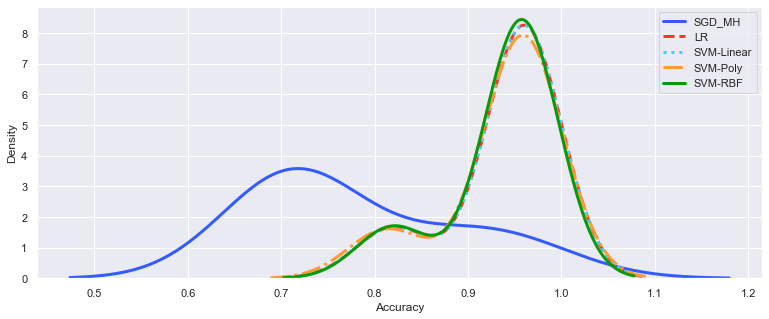

In [73]:
models_list = ['SGD_MH', 'LR', 'SVM-Linear', 'SVM-Poly', 'SVM-RBF']
plt.figure(figsize=(13,5))

for i in range (len(models_list)):
    cond = df['Model'] == models_list[i]
    sns.distplot(df[cond]['Accuracy'], hist=False, color=colors[i], kde_kws={"linewidth": 3, "linestyle": styles[i]})
    plt.legend(labels=models_list)

In [18]:
gb_model = df.groupby(df['Model']).median()
gb_model.reset_index(inplace=True)
gb_model

,Model,Accuracy
0,LR,0.960000
1,SGD_MH,0.723333
2,SVM-Linear,0.960000
3,SVM-Poly,0.956667
4,SVM-RBF,0.956667


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

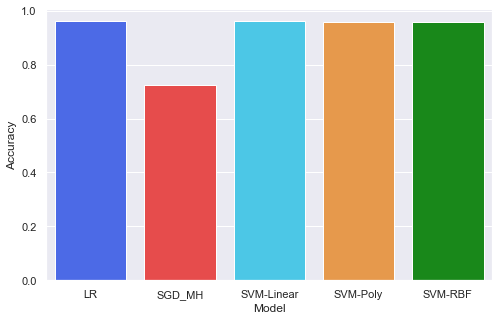

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data=gb_model, y='Accuracy', x='Model', palette=colors)

In [20]:
gb_features = df.groupby(df['Features']).median()
gb_features.reset_index(inplace=True)
gb_features

,Features,Accuracy
0,petal length (cm)petal width (cm),0.966667
1,sepal length (cm)petal length (cm),0.960000
2,sepal length (cm)petal width (cm),0.960000
3,sepal length (cm)sepal width (cm),0.820000
4,sepal width (cm)petal length (cm),0.953333
5,sepal width (cm)petal width (cm),0.960000


<AxesSubplot:xlabel='Features', ylabel='Accuracy'>

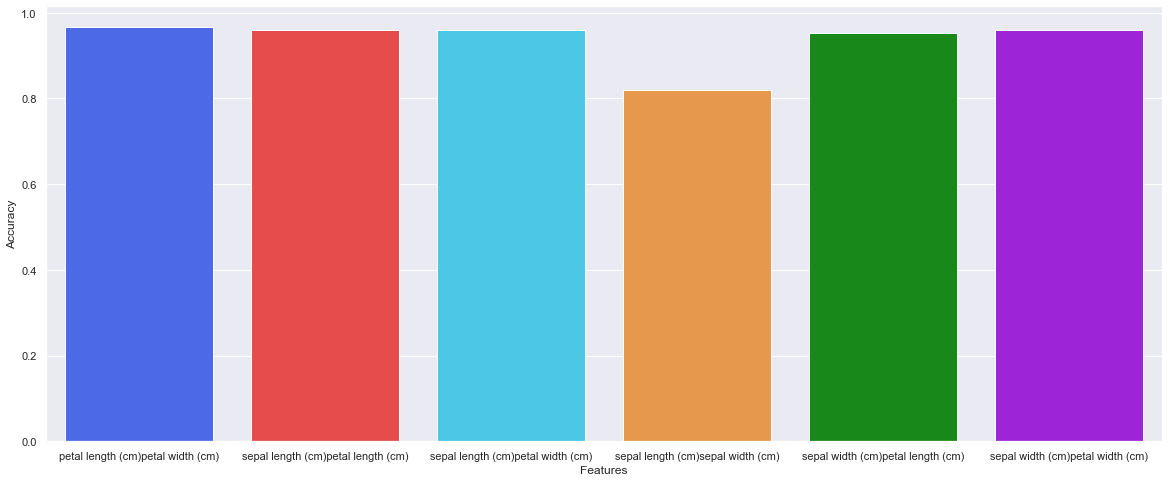

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(data=gb_features, y='Accuracy', x='Features', palette=colors)

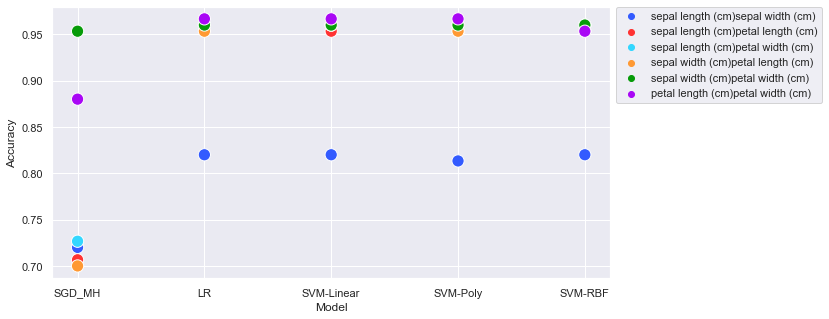

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=df['Accuracy'], x=df['Model'], hue=df['Features'], palette=colors, s=150)
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left', borderaxespad=0)

In [23]:
df['Features'].unique()

array(['sepal length (cm)sepal width (cm)',
       'sepal length (cm)petal length (cm)',
       'sepal length (cm)petal width (cm)',
       'sepal width (cm)petal length (cm)',
       'sepal width (cm)petal width (cm)',
       'petal length (cm)petal width (cm)'], dtype=object)

In [24]:
def plot_by_features(feature_pair, the_index):
    pairs_filter = df['Features'] == feature_pair
    pairs_df = df[pairs_filter]
    plt.figure(figsize=(10,3))
    sns.scatterplot(y=pairs_df['Accuracy'], x=pairs_df['Model'], s=150, color=colors[the_index]).set(title=feature_pair)

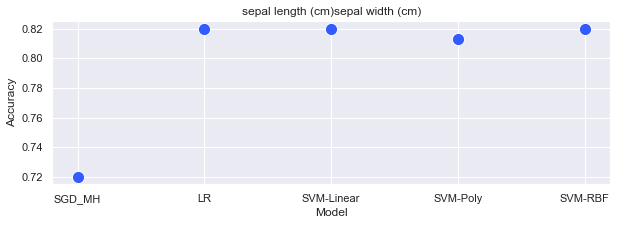

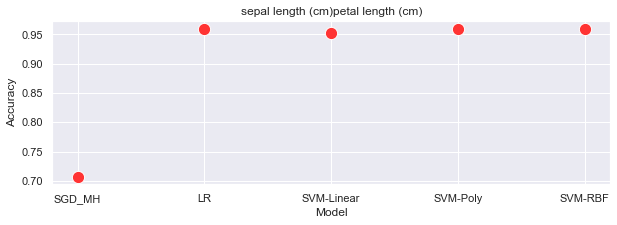

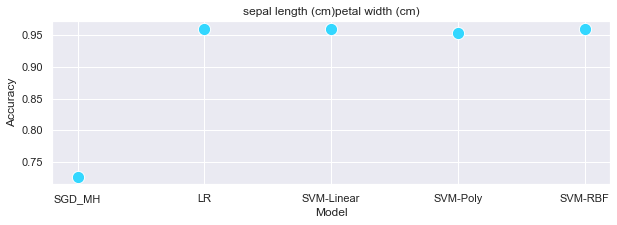

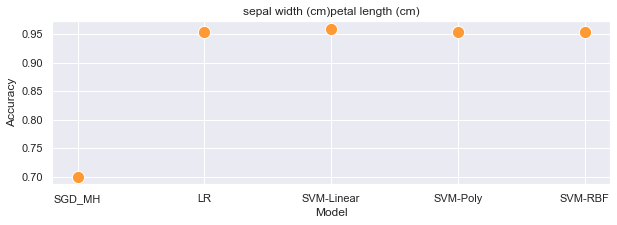

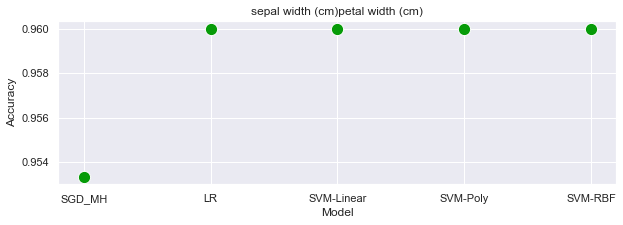

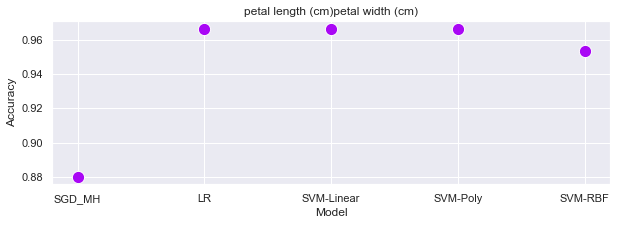

In [25]:
my_list = list(df['Features'].unique())
for i in range(len(my_list)):
    plot_by_features(my_list[i], i)

In [26]:
def pretty_plot(my_index, model_type):
    
    # classes - include all classes
    cdx = np.array([0,1,2]) 
    nC = len(cdx)

    # features - 2 at a time
    fdx = np.array(combos_F[my_index])

    # features chosen
    nF = len(fdx)

    features = []

    for i in range(nF):
        features.append(IrisF[fdx[i]])

    nbr_features = len(features)
    features_str = ''.join(features)

    # create arrays of zeroes:
    # YY = one column of all zeros, length equal to numY
    # XX = one column of all zeros , length = numY for each feature you have chosen
    
    numY = len(Y)
    
    YY = np.zeros((numY))
    XX = np.zeros((numY, nF))

    j = 0
    for i in range(len(Y)):
        for k in range(nC):
            if Y[i] == IC[cdx[k]]:        
                YY[j] = IC[cdx[k]]
                for m in range(nF):
                    XX[j,m] = X[i,fdx[m]] 
                j += 1
    
    # create and fit the models for each type of model
    if model_type == 'SGD_MH':
        clf = SGDClassifier('modified_huber', tol=1e-4, random_state=0)
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
    elif model_type == 'LR':
        clf = LogisticRegression()
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
    elif model_type == 'SVM-Linear':
        clf = SVC(kernel='linear')
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
    elif model_type == 'SVM-Poly':
        clf = SVC(kernel='poly')
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
    elif model_type == 'SVM-RBF':
        clf = SVC(kernel='rbf')
        model_str = model_type
        clf.fit(XX, YY)
        score = clf.score(XX, YY)
        
    fig, ax = plt.subplots(figsize=(8,8))

    xx1, xx2 = np.meshgrid(np.arange(x_min,x_max,0.05), np.arange(x_min,x_max,0.05))                     
    yy = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    yy = yy.reshape(xx1.shape)

# plot the decision regions    
    
    if (IC[0] in cdx): ax.scatter(xx1[yy == IC[0]], xx2[yy == IC[0]],
                    color=pltCback[0], marker='.')
    if (IC[1] in cdx): ax.scatter(xx1[yy == IC[1]], xx2[yy == IC[1]], 
                    color=pltCback[1], marker='.')
    if (IC[2] in cdx): ax.scatter(xx1[yy == IC[2]], xx2[yy == IC[2]],
                    color=pltCback[2], marker='.')    

# plot the data

    if (IC[0] in cdx): ax.scatter(XX[YY == IC[0],0], XX[YY == IC[0],1],
                    color=pltC[0], marker=pltM[0], label=IrisC[0])
    if (IC[1] in cdx): ax.scatter(XX[YY == IC[1],0], XX[YY == IC[1],1], 
                    color=pltC[1], marker=pltM[1], label=IrisC[1])
    if (IC[2] in cdx): ax.scatter(XX[YY == IC[2],0], XX[YY == IC[2],1],
                    color=pltC[2], marker=pltM[2], label=IrisC[2])
        
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(x_min,x_max)
    ax.set_xlabel(IrisF[fdx[0]])
    ax.set_ylabel(IrisF[fdx[1]])
    ax.legend(loc='upper right', fontsize='small')
    plt.show()    


### Plotting Predictions SGD Classifier

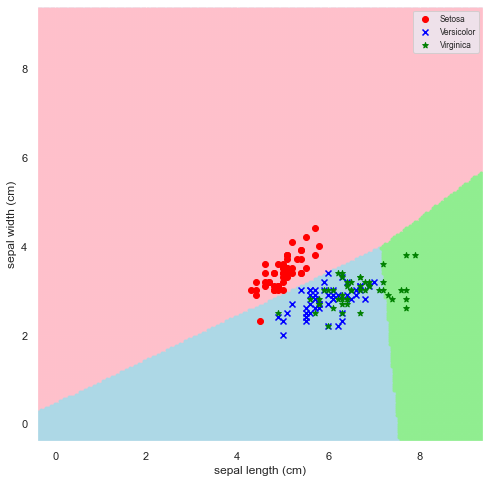

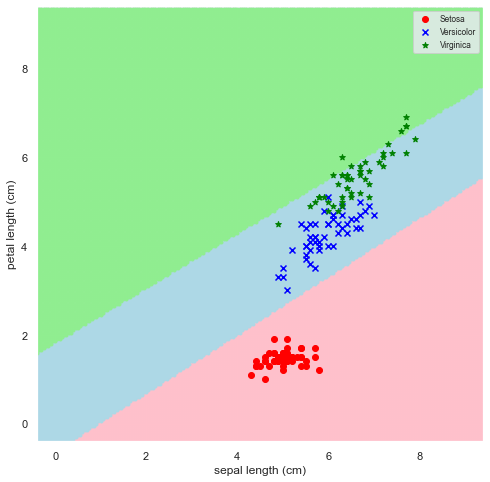

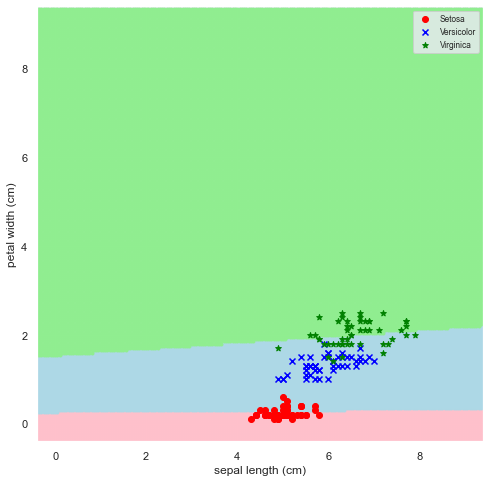

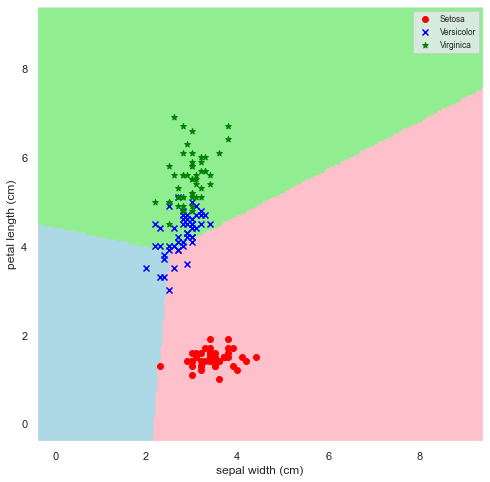

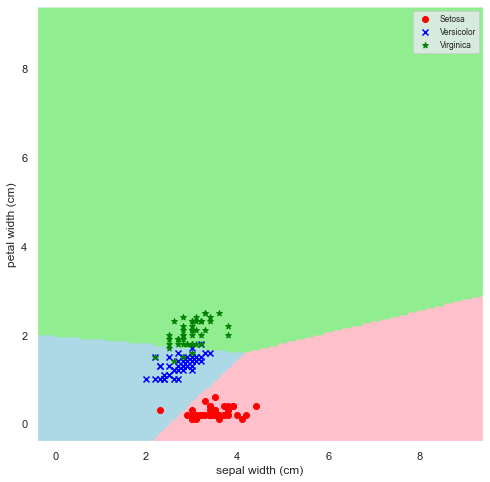

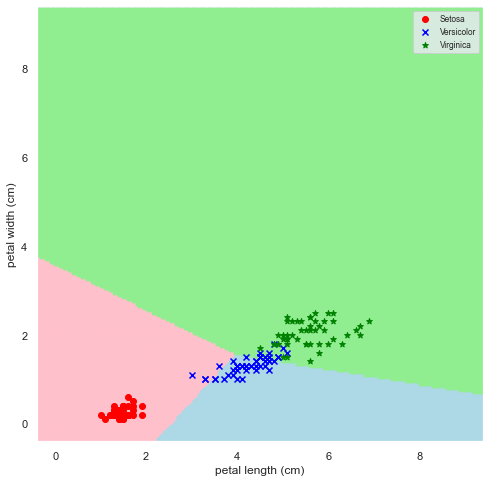

In [27]:
for i in range(len(combos_F)):
    all_results.append(pretty_plot(i, 'SGD_MH'))

### Plotting Predictions for Logistic Regression

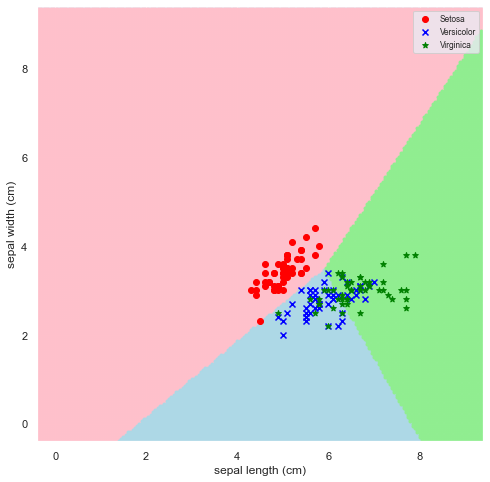

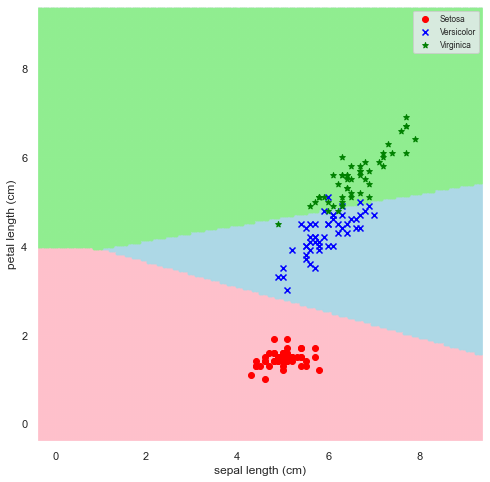

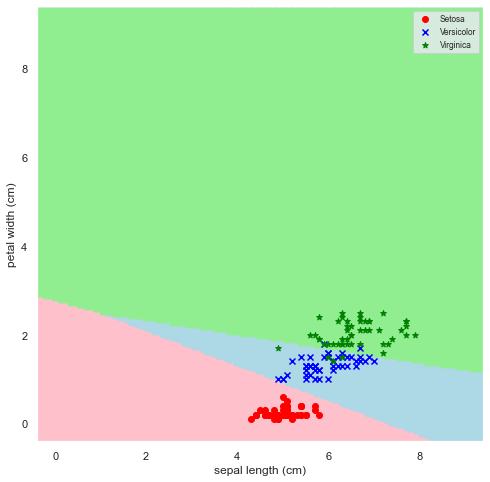

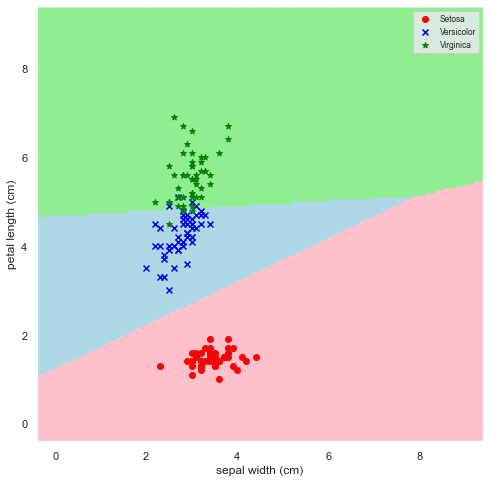

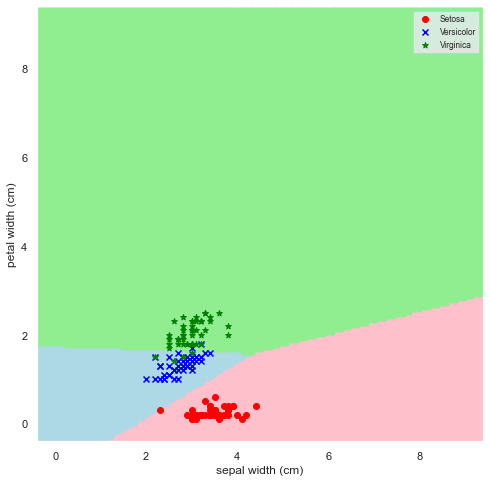

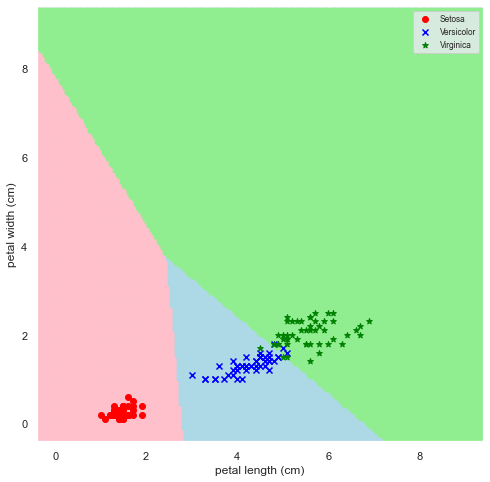

In [28]:
for i in range(len(combos_F)):
    all_results.append(pretty_plot(i, 'LR'))

### Plotting Predictions for SVM - Linear

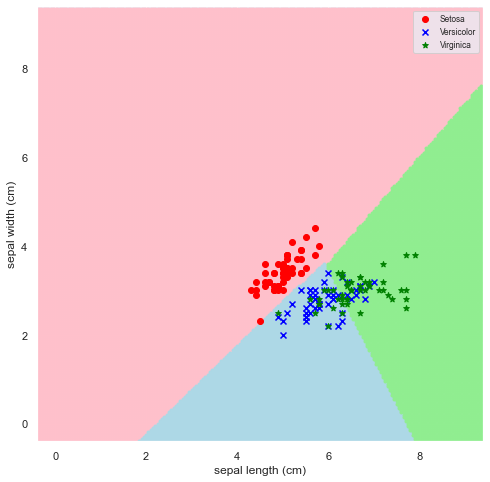

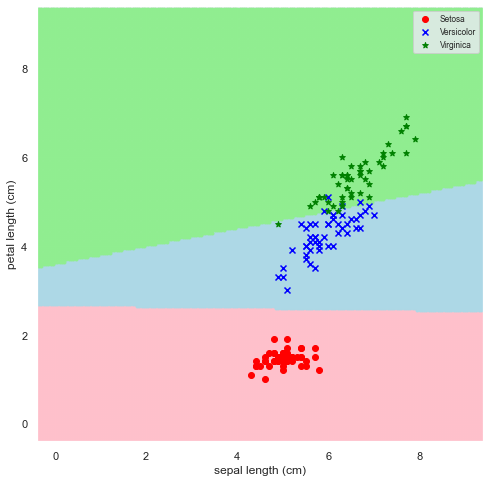

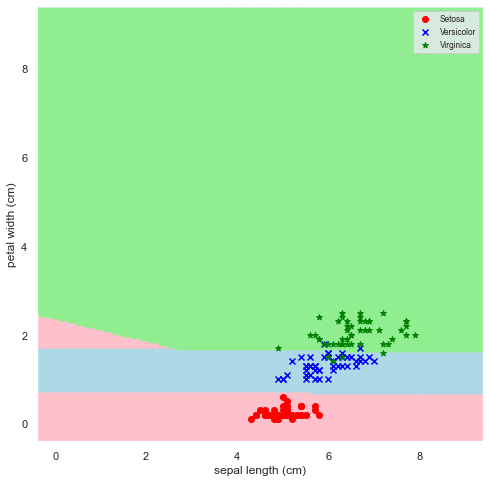

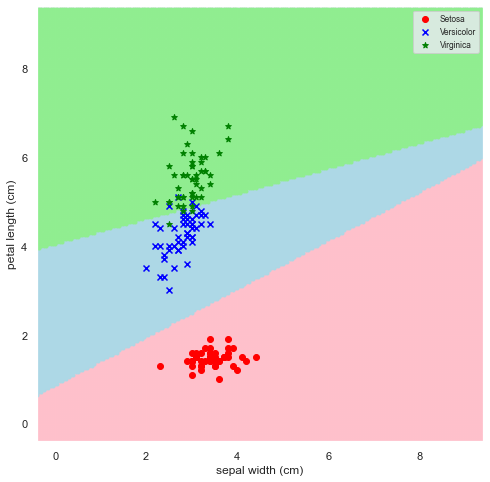

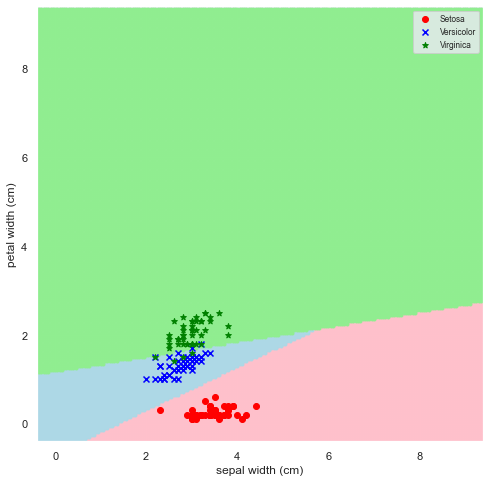

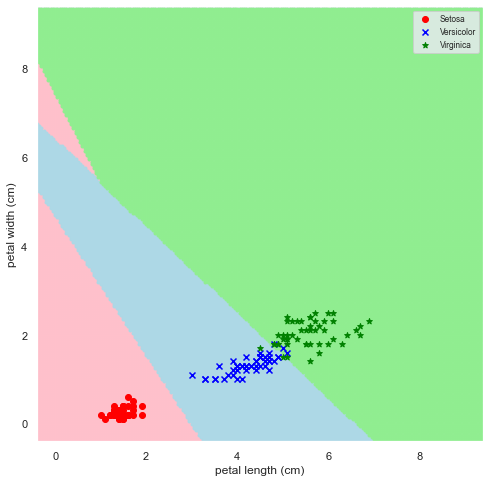

In [29]:
for i in range(len(combos_F)):
    all_results.append(pretty_plot(i, 'SVM-Linear'))

### Plotting Predictions for SVM-Polynomial

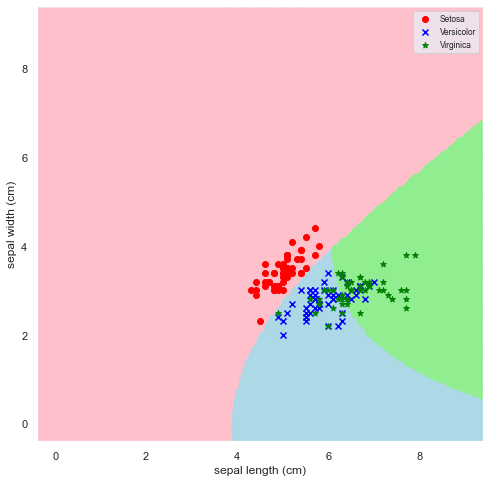

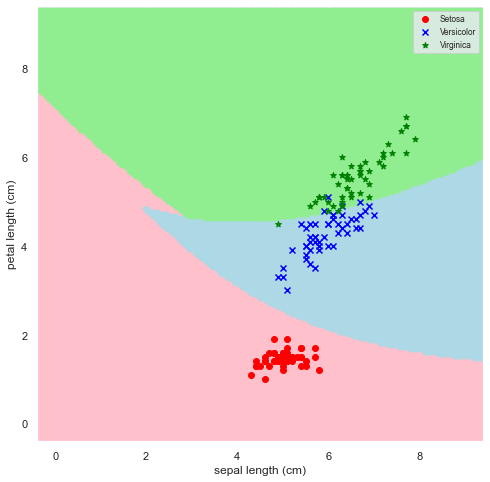

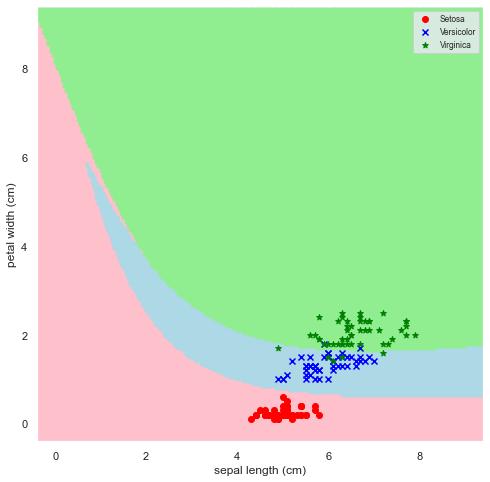

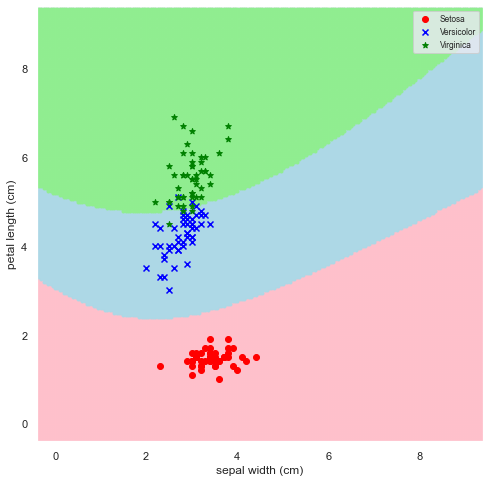

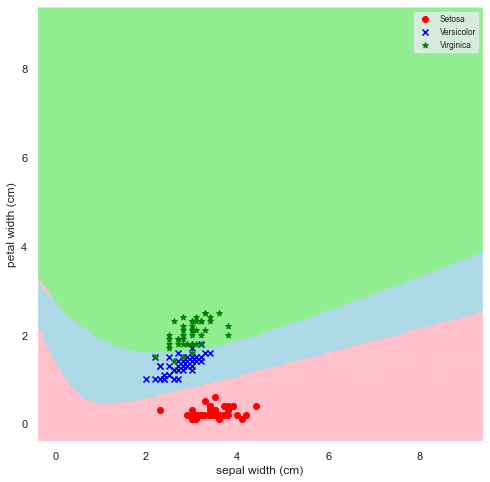

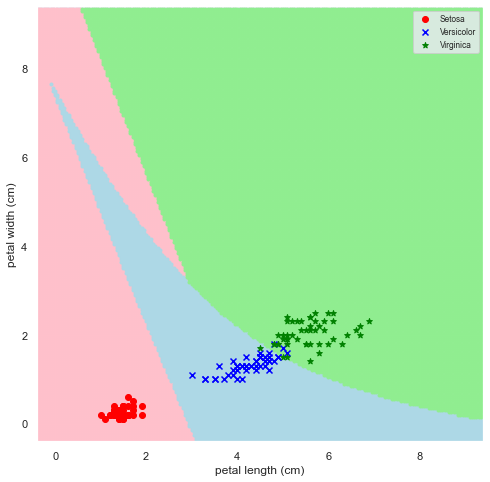

In [30]:
for i in range(len(combos_F)):
    all_results.append(pretty_plot(i, 'SVM-Poly'))

### Plotting Predictions for SVM-RBF

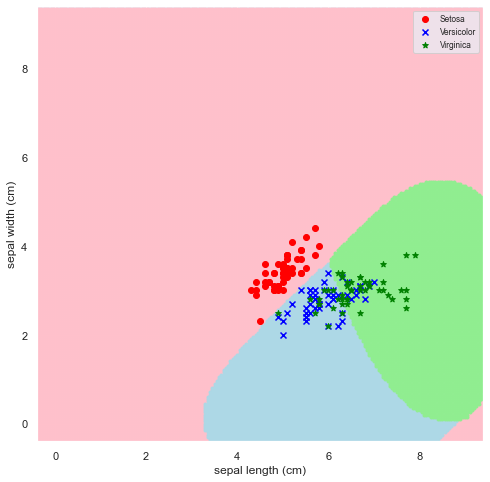

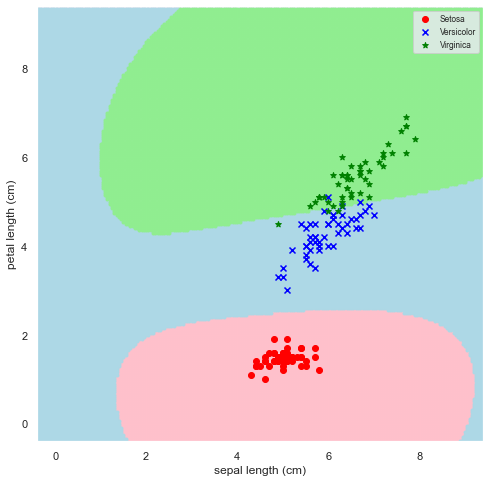

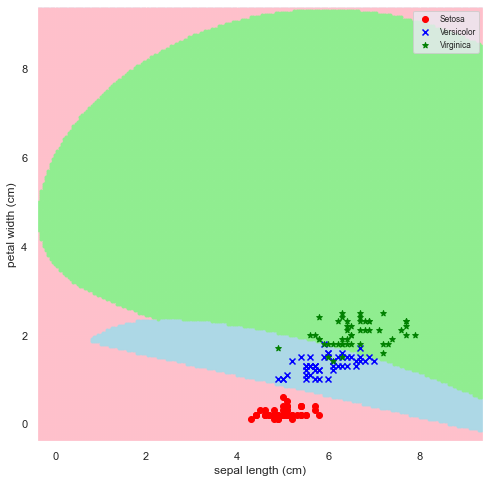

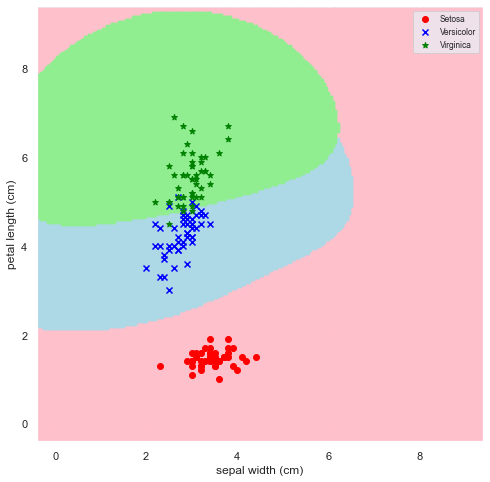

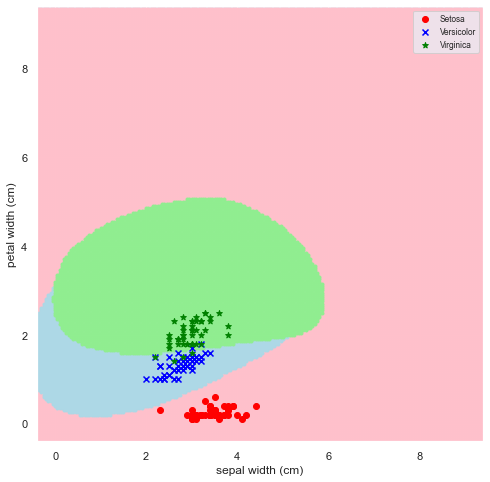

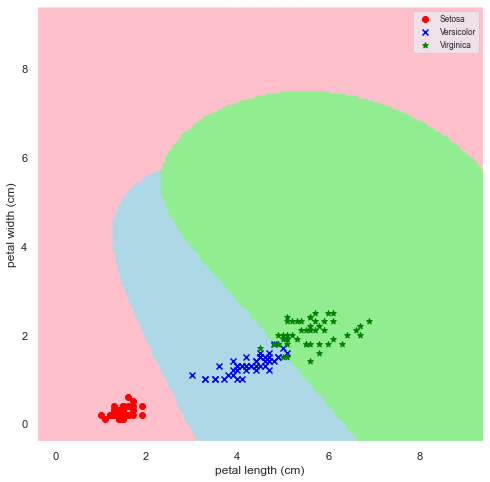

In [31]:
for i in range(len(combos_F)):
    all_results.append(pretty_plot(i, 'SVM-RBF'))

# Discussion of Observations

1. The models do not differ significantly in their distribution, with the exception of the SGD with modified huber loss function performing significantly worse than the other models. The figure below shows the distribution of accuracy scores, each line representing one of the five models respectively. We can see that while the SGD curve has a very wide distribution, the distribution shape of the other four models is nearly identical. 

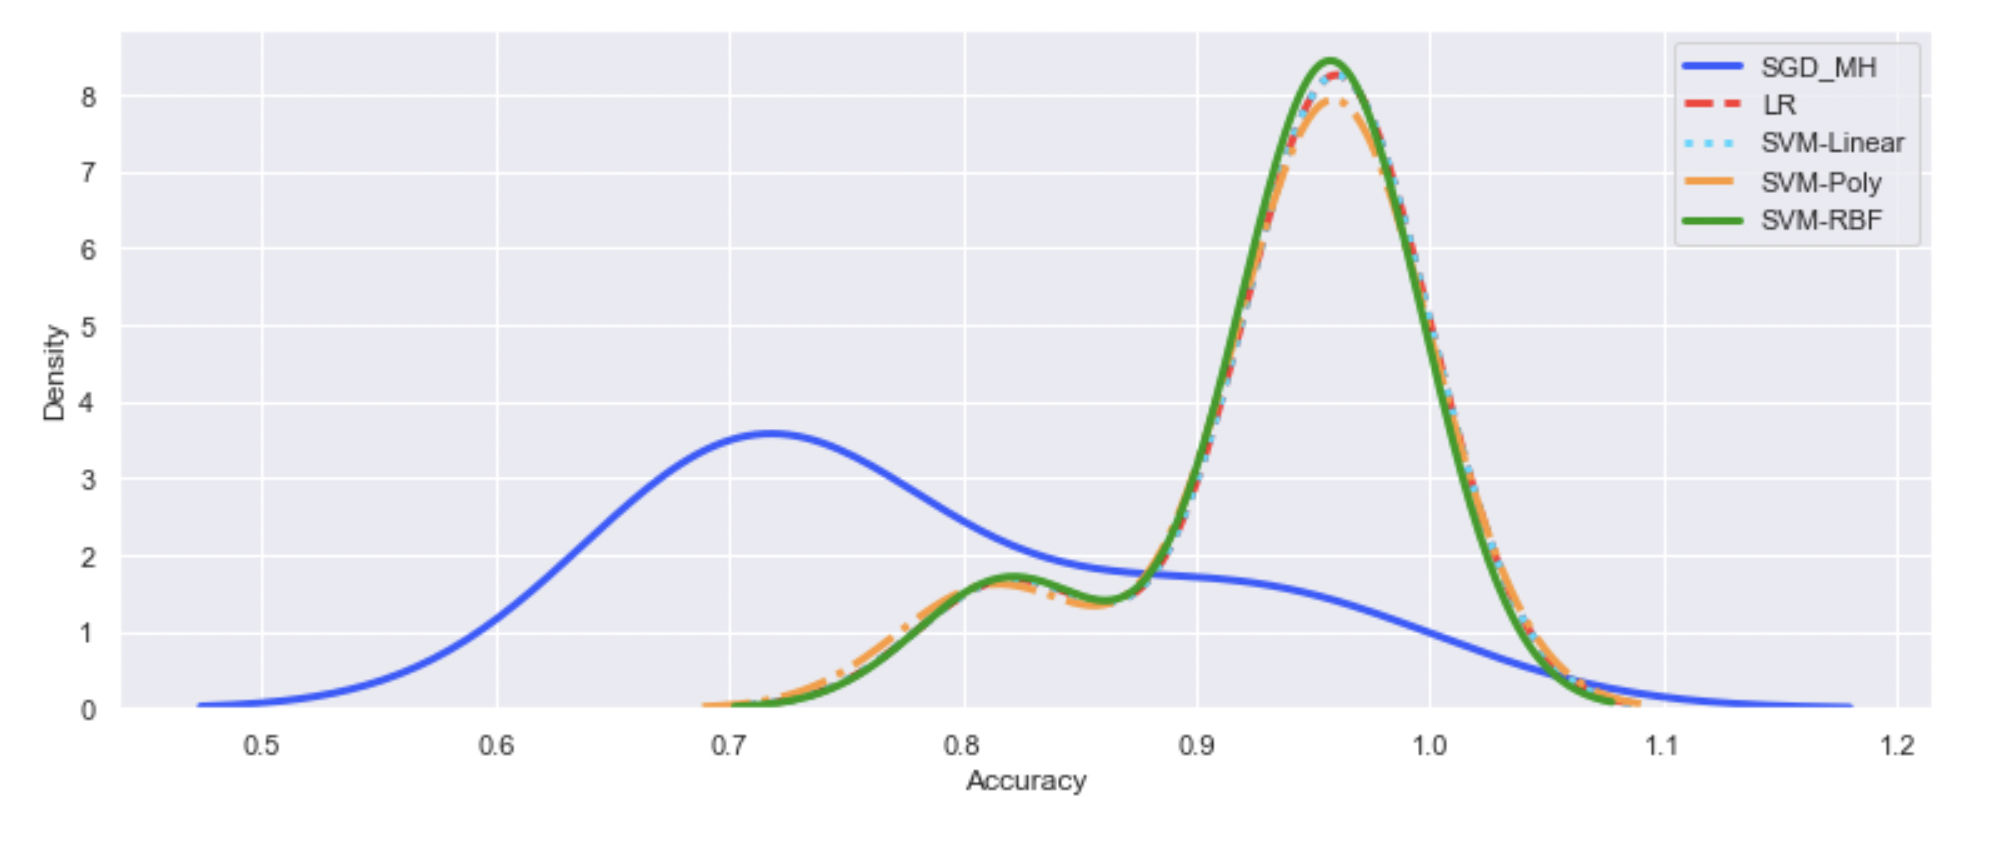

2. A bar graph of the average accuracy score for each model shows a similar result. While the mean accuracy scores for the SVM models and logistic regression fall within the range of 95-96%, the average accuracy score for the five iterations of the SGD model is 72.3%. Below are both the bar graph showing this result, and the table listing the actual numerical averages.

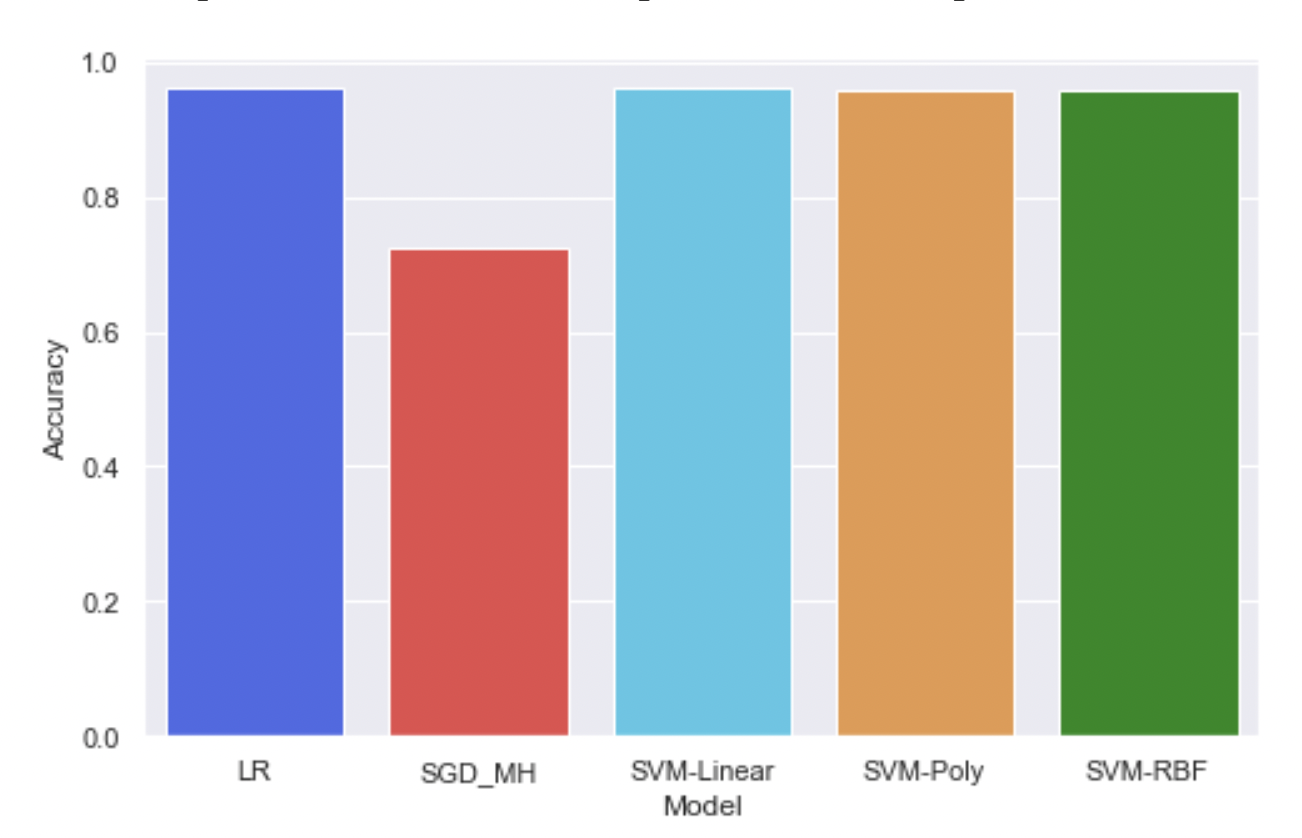

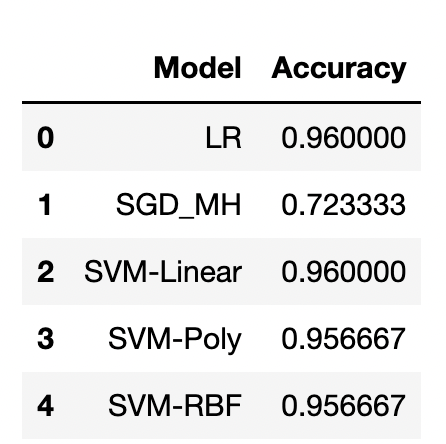